# Original Model

K-fold 交叉验证

使用了正则化

清洗数据，去掉大gamma，线性标准化，激活函数用relu，dropout 0.2

In [43]:
import pandas as pd
import numpy as np
import pyttsx3

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras import regularizers

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold
#from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
md_para = pd.read_csv('../data/substituted_benzene_para_md.csv',index_col=0,header=0)
md_orth = pd.read_csv('../data/substituted_benzene_orth_md.csv',index_col=0,header=0)
md_meta = pd.read_csv('../data/substituted_benzene_meta_md.csv',index_col=0,header=0)
mddata = pd.concat([md_meta,md_orth,md_para],axis=0,join='inner',ignore_index=True)

gammadata_meta = pd.read_csv('../data/substituted_benzene_meta_gamma.csv',index_col=0,header=0)
gammadata_orth = pd.read_csv('../data/substituted_benzene_orth_gamma.csv',index_col=0,header=0)
gammadata_para = pd.read_csv('../data/substituted_benzene_para_gamma.csv',index_col=0,header=0)
gammadata = pd.concat([gammadata_meta,gammadata_orth,gammadata_para],axis=0,join='inner',ignore_index=True)

In [80]:
def dfclean(data):
    temp = data[data.T[data.dtypes!=np.object].index]
    kk=[]
    for column in temp.columns:
        if len(set(temp[column]))<4:
            kk.append(column)
    result = temp.drop(columns=kk)
    return result

In [81]:
rawdataset = pd.merge(mddata, gammadata, on='cindex')
dataset = dfclean(rawdataset)
dataset = (dataset-dataset.min(axis=0))/(dataset.max(axis = 0)-dataset.min(axis=0))

In [92]:
engine = pyttsx3.init() 
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[2].id)

# 创建模型
def create_model():
    
    model = Sequential()
    model.add(Dense(units = 64, input_dim = X.shape[1]))
    model.add(Dense(64, input_dim=64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.1),
                    activity_regularizer=regularizers.l1(0.1)))
    model.add(Activation("relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(Dense(units = 1))
    model.compile(loss = 'mean_absolute_error', optimizer = SGD(lr = 0.001, momentum = 0.9, nesterov = True),metrics=['accuracy'])
    
    return model


def main():
    
    n_split = 10
    x = dataset.iloc[:, 1:-1]
    y = dataset.iloc[:, -1]
    avg_accuracy = 0
    avg_loss = 0
    
    for train_index, test_index in KFold(n_split).split(x):
        
        engine.say('model training!')
        engine.runAndWait()

        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        print("create model")
        model = create_model()
        
        print("model trainning")
        history = model.fit(x_train, y_train, epochs = 100, batch_size = 9,verbose=0)
        
        score = model.evaluate(x_test, y_test, verbose = 0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        
        y_pred = model.predict(x_test)
        
        y_test = np.array(y_test).reshape(-1,1)
        print(y_pred.shape,x_test.shape)
        rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5
        print("Neural Network RMS", rms)
        
        a = abs(y_test-y_pred)/y_test < 0.05
        i=0
        for v in a:
            if v:
                i+=1
        print('my accuracy: ',i/len(y_test))
        avg_accuracy += model.evaluate(x_test, y_test)[1]
        avg_loss += model.evaluate(x_test, y_test)[0]
        
        
    print("K fold average accuracy: {}".format(avg_accuracy / n_split))
    print("K fold average loss: {}".format(avg_loss / n_split))
    
    
main()

engine.say('Your  job has been completed!')
engine.runAndWait()

create model
model trainning
Test loss: 0.07064607739448547
Test accuracy: 0.0
(36, 1) (36, 945)
Neural Network RMS 0.08615808739009909
my accuracy:  0.05555555555555555
2/2 [==============================] - 0s 6ms/step - loss: 0.0706 - accuracy: 0.0000e+00
create model
model trainning
Test loss: 0.10406608134508133
Test accuracy: 0.0
(36, 1) (36, 945)
Neural Network RMS 0.13022417917227302
my accuracy:  0.08333333333333333
2/2 [==============================] - 0s 8ms/step - loss: 0.1041 - accuracy: 0.0000e+00
create model
model trainning
Test loss: 0.10382740944623947
Test accuracy: 0.0
(36, 1) (36, 945)
Neural Network RMS 0.1436059124364237
my accuracy:  0.05555555555555555
2/2 [==============================] - 0s 6ms/step - loss: 0.1038 - accuracy: 0.0000e+00
create model
model trainning
Test loss: 0.0977221429347992
Test accuracy: 0.0
(36, 1) (36, 945)
Neural Network RMS 0.10909516827229329
my accuracy:  0.027777777777777776
2/2 [==============================] - 0s 6ms/step - l

<ipython-input-92-7da2d5dd502e>:54: RuntimeWarning: divide by zero encountered in true_divide
  a = abs(y_test-y_pred)/y_test < 0.05


2/2 [==============================] - 0s 7ms/step - loss: 0.1500 - accuracy: 0.0278
create model
model trainning
Test loss: 0.1283932328224182
Test accuracy: 0.0
(36, 1) (36, 945)
Neural Network RMS 0.18213129120413551
my accuracy:  0.08333333333333333
2/2 [==============================] - 0s 6ms/step - loss: 0.1284 - accuracy: 0.0000e+00
K fold average accuracy: 0.002777777798473835
K fold average loss: 0.11285947933793068


In [67]:
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]
avg_accuracy = 0
avg_loss = 0
for train_index, test_index in KFold(10).split(x):
    #print("test index: ", test_index)
    #print("train index: ", train_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(x_train.size,y_train.size)

306180 324
306180 324
306180 324
306180 324
306180 324
306180 324
306180 324
306180 324
306180 324
306180 324


In [ ]:
x

In [56]:
dataset.shape

(360, 947)

In [33]:
#dataset = dataset[(dataset['magnitude_gamma'] < 22088)]

In [39]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
    model = Sequential()
    model.add(Dense(units = 64, input_dim = X.shape[1]))
    model.add(Dense(64, input_dim=64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.1),
                    activity_regularizer=regularizers.l1(0.1)))
    model.add(Activation("relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(Dense(units = 1))
    # Compile model
    model.compile(loss = 'mean_absolute_error', optimizer = SGD(lr = 0.0001, momentum = 0.9, nesterov = True),metrics=['accuracy'])
    # Fit the model
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=42)
    history = model.fit(X_train, y_train, epochs = 500, batch_size = 36,validation_data = (X_test, y_test),verbose=0)
    # evaluate the model
    score = model.evaluate(X_test, y_test, verbose = 0)
    
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    y_pred = model.predict(X_test)
    rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5
    print("Neural Network RMS", rms)
    a = abs(y_test-y_pred)/y_test < 0.05
    i=0
    for v in a:
        if v:
            i+=1
    print('my accuracy: ',i/len(y_test))
    cvscores.append(scores[1])
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [14]:

print(i)

57


0.6333333333333333

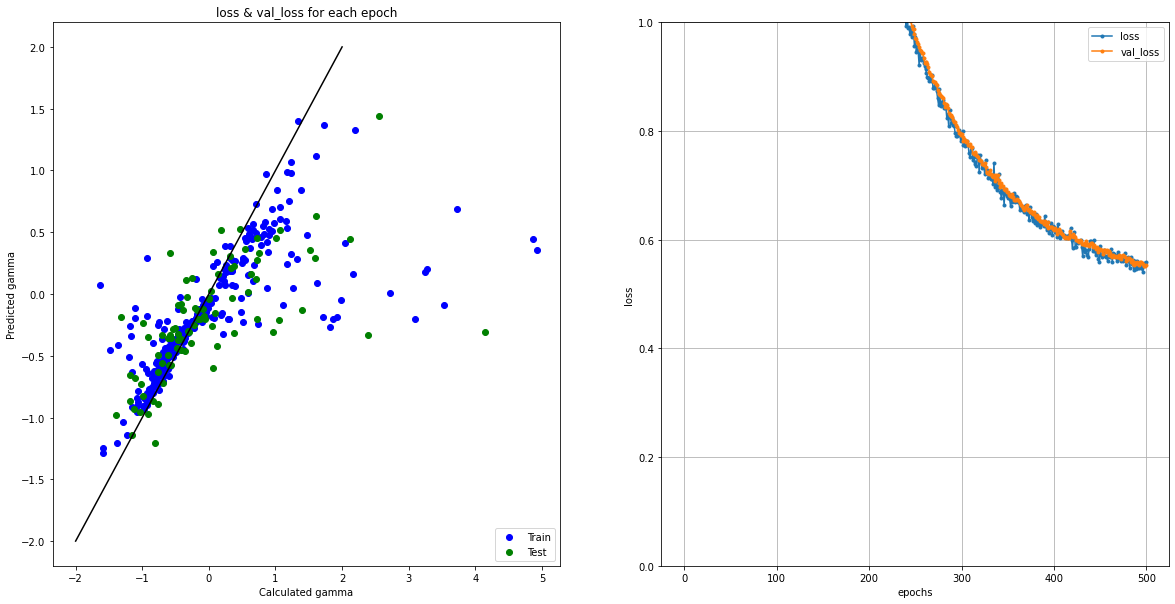

In [17]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_title('Neural Network Predictor')
ax1.set_xlabel('Calculated gamma')
ax1.set_ylabel('Predicted gamma')
#ax1.set_xlim(0,1)
#ax1.set_ylim(0,1)
ax1.scatter(y_train, model.predict(X_train), label = 'Train', c = 'blue')
ax1.scatter(y_test, model.predict(X_test),c='green', label = 'Test', alpha = None)
ax1.plot([-2,2],[-2,2],c = 'k')
ax1.legend(loc = 4)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)

ax2 = fig.add_subplot(122)
ax1.set_title('loss & val_loss for each epoch')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.set_ylim(0,1)
ax2.plot(range(epochs), loss, marker = '.', label = 'loss')
ax2.plot(range(epochs), val_loss, marker = '.', label = 'val_loss')
ax2.legend(loc = 'best')
ax2.grid()

plt.show()

## Conclusion

relu 的效果还不错